In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [60]:
df=pd.read_csv(r"Data\real_world_textile_dataset_5000.csv")
df.head()

,Product_ID,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,P00001,Sports Shoes,Men,Premium Textile Ltd,156,91,51,50,666,980,10,35280.0,8640.0
1,P00002,Leather Belt,Men,FashionKart Supplies,409,171,86,152,969,1412,15,102017.0,19652.0
2,P00003,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,182,221,573,15,76953.9,42035.9
3,P00004,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,57,389,934,25,44131.5,19624.5
4,P00005,Silk Saree,Kids,FashionKart Supplies,369,150,0,200,1040,1306,5,186105.0,30105.0


In [61]:
df.info()
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_ID         5000 non-null   object 
 1   Product_Name       5000 non-null   object 
 2   Category           5000 non-null   object 
 3   Supplier           5000 non-null   object 
 4   Demand_Index       5000 non-null   int64  
 5   Current_Stock_Qty  5000 non-null   int64  
 6   Stock_After_Sales  5000 non-null   int64  
 7   Reorder_Level      5000 non-null   int64  
 8   Purchase_Price     5000 non-null   int64  
 9   Selling_Price      5000 non-null   int64  
 10  Discount_%         5000 non-null   int64  
 11  Revenue            5000 non-null   float64
 12  Profit             5000 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 507.9+ KB
Shape: (5000, 13)


In [62]:
df.isnull().sum()

Product_ID           0
Product_Name         0
Category             0
Supplier             0
Demand_Index         0
Current_Stock_Qty    0
Stock_After_Sales    0
Reorder_Level        0
Purchase_Price       0
Selling_Price        0
Discount_%           0
Revenue              0
Profit               0
dtype: int64

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
neg_values = {col: df[df[col] < 0][col].count()
                for col in num_cols
                   if (df[col] < 0).any()}
print("\n No. of Negative Value ")
print(neg_values)



 No. of Negative Value 
{'Profit': np.int64(614)}


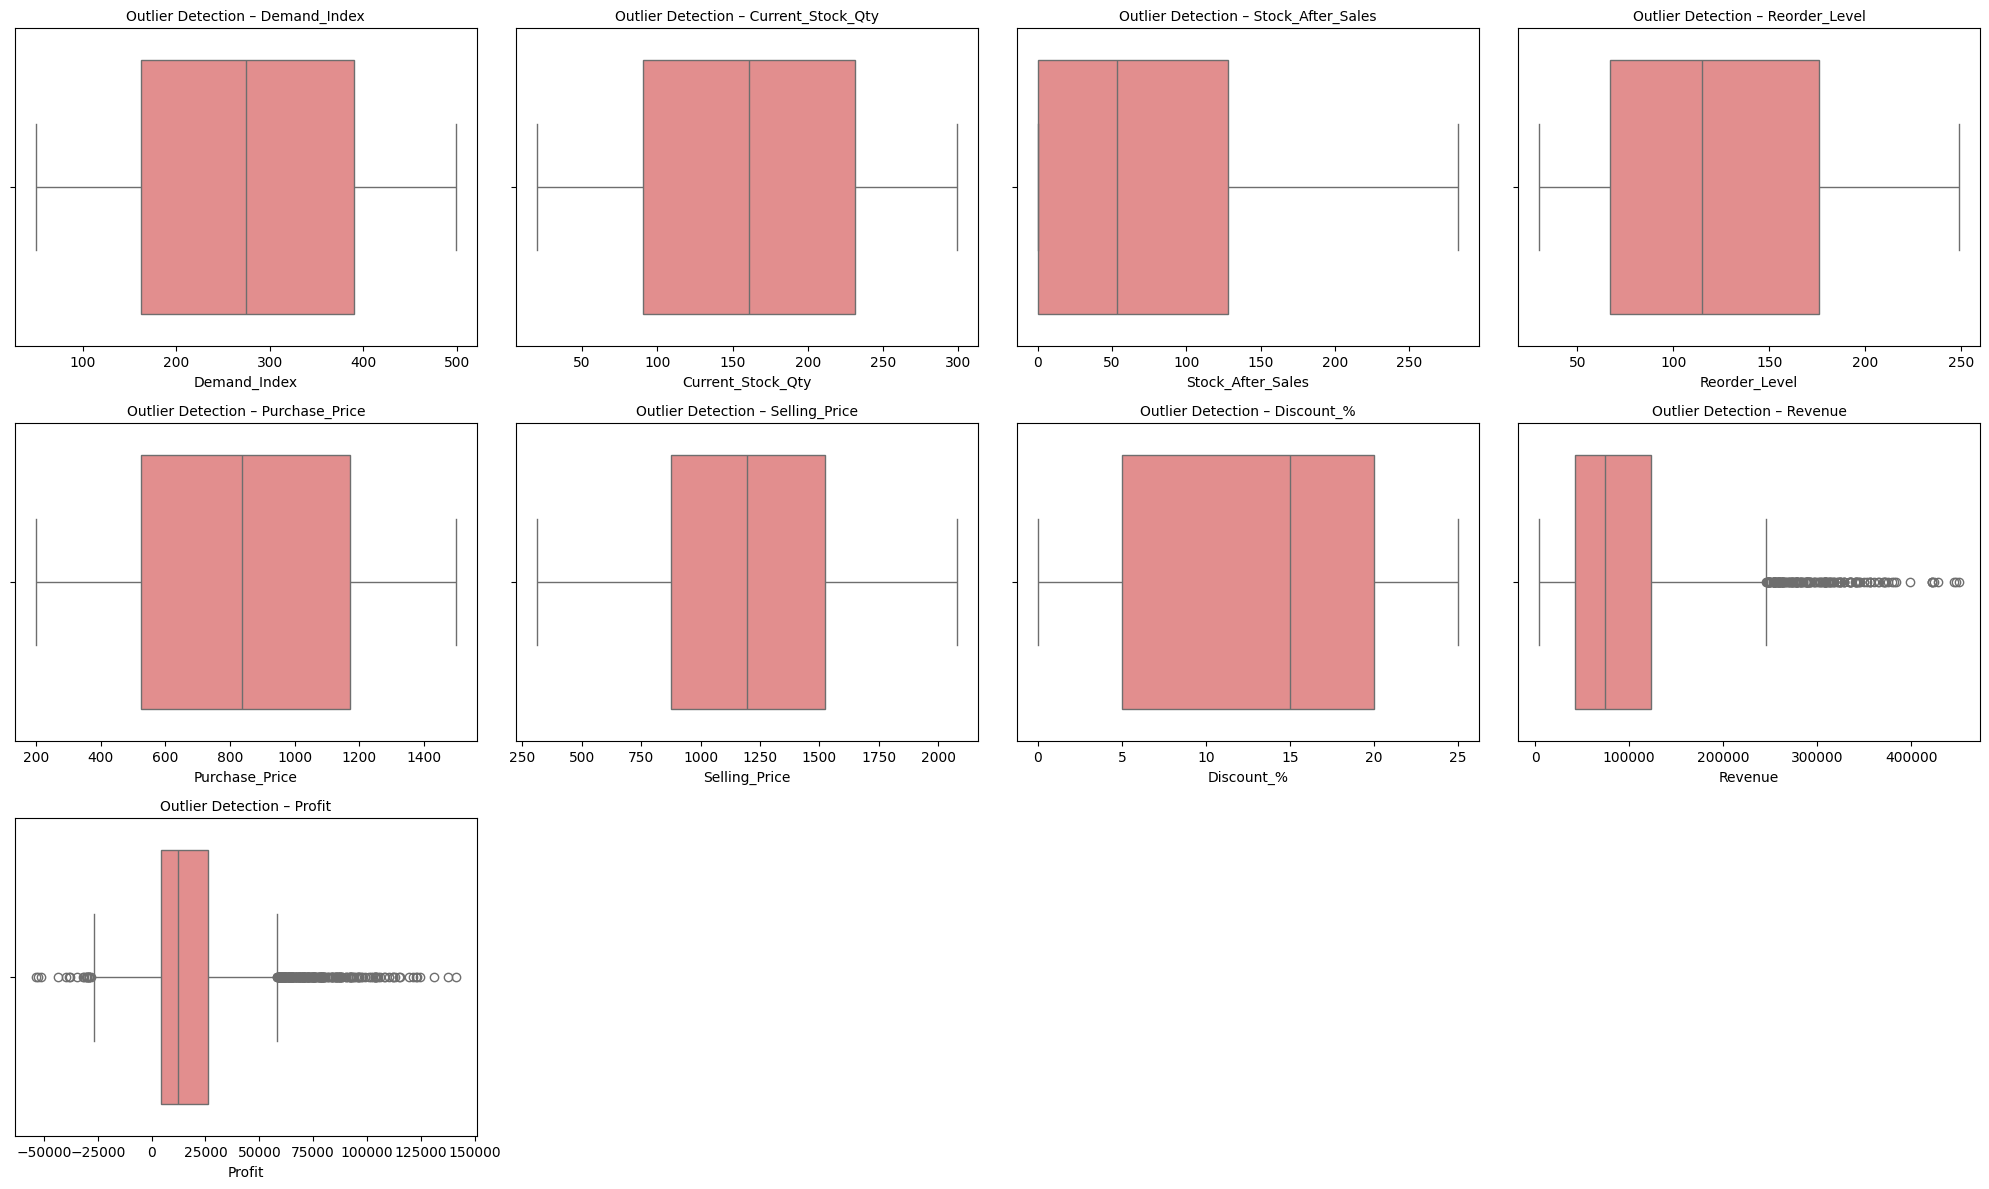

In [65]:
import math
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Outlier Detection – {col}", fontsize=10)
    plt.tight_layout()

plt.show()

In [66]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers")

Demand_Index: 0 outliers
Current_Stock_Qty: 0 outliers
Stock_After_Sales: 0 outliers
Reorder_Level: 0 outliers
Purchase_Price: 0 outliers
Selling_Price: 0 outliers
Discount_%: 0 outliers
Revenue: 174 outliers
Profit: 259 outliers


In [67]:
# df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['DayOfWeek'] = df['Date'].dt.dayofweek
# df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)


In [68]:
# df["Reason"]= df["Reason"].fillna("Not returned")
# df.head()

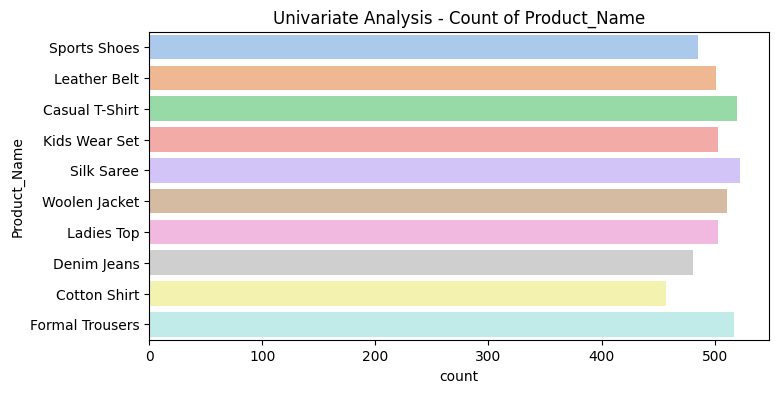

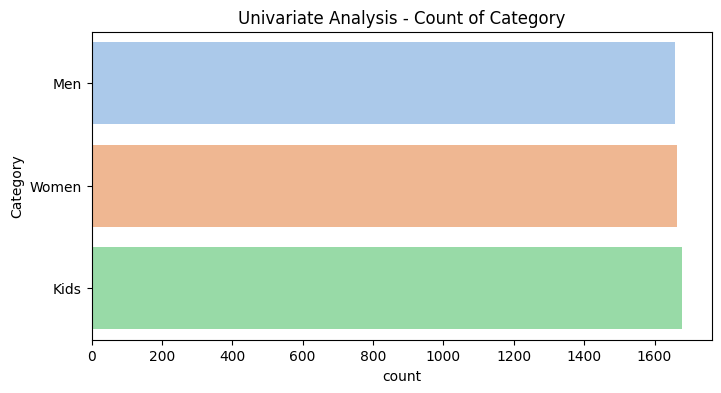

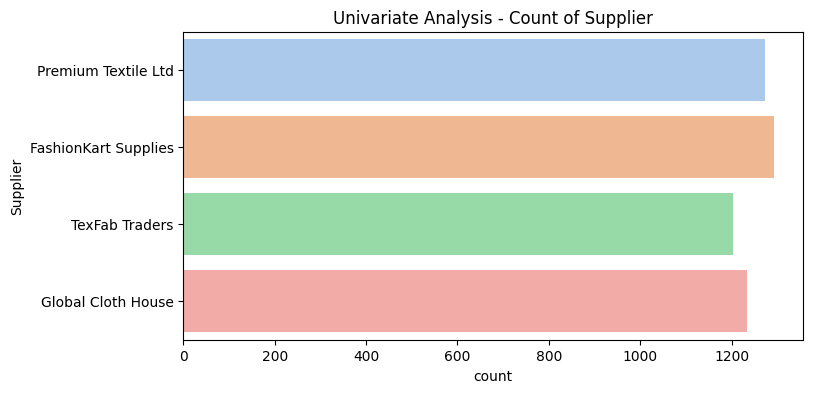

In [69]:
cat_cols = df.drop("Product_ID",axis=1).select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, palette="pastel")
    plt.title(f"Univariate Analysis - Count of {col}")
    plt.show()

In [70]:
numeric_df = df.select_dtypes(include=np.number)

# skewness & kurtosis
desc = numeric_df.describe().T
desc['skew'] = numeric_df.skew()
desc['kurtosis'] = numeric_df.kurtosis()

desc = desc.round(2)

print(" Statistical Summary:\n")
display(desc.style.background_gradient(cmap='Greens').set_caption("Descriptive Statistics with Skewness & Kurtosis"))

# Correlation matrix
corr_matrix = numeric_df.corr().round(2)
print("\n Correlation Matrix:\n")
display(corr_matrix.style.background_gradient(cmap='YlGnBu').set_caption("Feature Correlation Matrix"))

# Covariance matrix
cov_matrix = numeric_df.cov().round(2)
print("\n Covariance Matrix:\n")
display(cov_matrix.style.background_gradient(cmap='PuBu').set_caption("Feature Covariance Matrix"))

 Statistical Summary:



,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Demand_Index,5000.000000,275.200000,130.760000,50.000000,162.750000,275.000000,390.250000,499.000000,-0.010000,-1.210000
Current_Stock_Qty,5000.000000,160.470000,81.140000,20.000000,90.750000,161.000000,231.000000,299.000000,-0.010000,-1.200000
Stock_After_Sales,5000.000000,72.150000,74.540000,0.000000,0.000000,53.000000,128.000000,283.000000,0.720000,-0.660000
Reorder_Level,5000.000000,122.950000,63.830000,30.000000,67.000000,115.000000,176.000000,249.000000,0.340000,-1.100000
Purchase_Price,5000.000000,847.350000,375.320000,200.000000,525.000000,839.000000,1171.000000,1499.000000,0.020000,-1.190000
Selling_Price,5000.000000,1196.040000,401.780000,311.000000,874.000000,1196.000000,1523.000000,2079.000000,0.000000,-0.930000
Discount_%,5000.000000,12.540000,8.570000,0.000000,5.000000,15.000000,20.000000,25.000000,-0.010000,-1.290000
Revenue,5000.000000,92414.270000,67166.630000,4149.750000,42188.810000,74698.800000,123508.200000,450790.200000,1.420000,2.470000
Profit,5000.000000,17443.760000,20552.910000,-53771.250000,4435.910000,12403.500000,25960.000000,141252.000000,1.400000,3.410000



 Correlation Matrix:



,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
Demand_Index,1.000000,0.010000,-0.450000,0.880000,0.010000,0.010000,-0.010000,0.530000,0.330000
Current_Stock_Qty,0.010000,1.000000,0.770000,0.010000,-0.010000,-0.000000,0.000000,0.360000,0.220000
Stock_After_Sales,-0.450000,0.770000,1.000000,-0.390000,-0.010000,-0.010000,0.010000,-0.190000,-0.110000
Reorder_Level,0.880000,0.010000,-0.390000,1.000000,-0.010000,-0.010000,-0.010000,0.460000,0.280000
Purchase_Price,0.010000,-0.010000,-0.010000,-0.010000,1.000000,0.930000,0.000000,0.440000,-0.210000
Selling_Price,0.010000,-0.000000,-0.010000,-0.010000,0.930000,1.000000,0.010000,0.470000,-0.000000
Discount_%,-0.010000,0.000000,0.010000,-0.010000,0.000000,0.010000,1.000000,-0.130000,-0.430000
Revenue,0.530000,0.360000,-0.190000,0.460000,0.440000,0.470000,-0.130000,1.000000,0.490000
Profit,0.330000,0.220000,-0.110000,0.280000,-0.210000,-0.000000,-0.430000,0.490000,1.000000



 Covariance Matrix:



,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
Demand_Index,17097.340000,117.510000,-4401.720000,7353.080000,331.390000,290.270000,-13.540000,4692154.210000,876075.580000
Current_Stock_Qty,117.510000,6583.840000,4656.990000,71.280000,-234.260000,-148.950000,0.490000,1972659.220000,372414.690000
Stock_After_Sales,-4401.720000,4656.990000,5555.510000,-1850.380000,-368.790000,-199.730000,3.430000,-974139.450000,-162188.420000
Reorder_Level,7353.080000,71.280000,-1850.380000,4073.910000,-130.190000,-212.140000,-7.670000,1970129.220000,371785.680000
Purchase_Price,331.390000,-234.260000,-368.790000,-130.190000,140868.700000,140687.880000,15.250000,11084006.030000,-1593904.010000
Selling_Price,290.270000,-148.950000,-199.730000,-212.140000,140687.880000,161429.420000,42.430000,12565482.610000,-9870.310000
Discount_%,-13.540000,0.490000,3.430000,-7.670000,15.250000,42.430000,73.370000,-75477.230000,-76362.330000
Revenue,4692154.210000,1972659.220000,-974139.450000,1970129.220000,11084006.030000,12565482.610000,-75477.230000,4511355706.730000,678010528.310000
Profit,876075.580000,372414.690000,-162188.420000,371785.680000,-1593904.010000,-9870.310000,-76362.330000,678010528.310000,422422257.800000


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [72]:
df.head()

,Product_ID,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Reorder_Level,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,P00001,Sports Shoes,Men,Premium Textile Ltd,156,91,51,50,666,980,10,35280.0,8640.0
1,P00002,Leather Belt,Men,FashionKart Supplies,409,171,86,152,969,1412,15,102017.0,19652.0
2,P00003,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,182,221,573,15,76953.9,42035.9
3,P00004,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,57,389,934,25,44131.5,19624.5
4,P00005,Silk Saree,Kids,FashionKart Supplies,369,150,0,200,1040,1306,5,186105.0,30105.0


## Droping the column

In [73]:
target = "Reorder_Level"

X = df.drop(columns=[target, 'Product_ID'], errors='ignore')
y = df[target]

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

In [74]:
X.head()

,Product_Name,Category,Supplier,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit
0,Sports Shoes,Men,Premium Textile Ltd,156,91,51,666,980,10,35280.0,8640.0
1,Leather Belt,Men,FashionKart Supplies,409,171,86,969,1412,15,102017.0,19652.0
2,Casual T-Shirt,Women,FashionKart Supplies,493,296,138,221,573,15,76953.9,42035.9
3,Kids Wear Set,Men,Premium Textile Ltd,108,189,126,389,934,25,44131.5,19624.5
4,Silk Saree,Kids,FashionKart Supplies,369,150,0,1040,1306,5,186105.0,30105.0


In [75]:
X=pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=np.int8)
X.head()

,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit,Product_Name_Cotton Shirt,Product_Name_Denim Jeans,Product_Name_Formal Trousers,Product_Name_Kids Wear Set,Product_Name_Ladies Top,Product_Name_Leather Belt,Product_Name_Silk Saree,Product_Name_Sports Shoes,Product_Name_Woolen Jacket,Category_Men,Category_Women,Supplier_Global Cloth House,Supplier_Premium Textile Ltd,Supplier_TexFab Traders
0,156,91,51,666,980,10,35280.0,8640.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,409,171,86,969,1412,15,102017.0,19652.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,493,296,138,221,573,15,76953.9,42035.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,108,189,126,389,934,25,44131.5,19624.5,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,369,150,0,1040,1306,5,186105.0,30105.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for col in cat_cols:
#     if col in X.columns:
#         X[col] = le.fit_transform(X[col])

In [77]:
y.head(5)

0     50
1    152
2    182
3     57
4    200
Name: Reorder_Level, dtype: int64

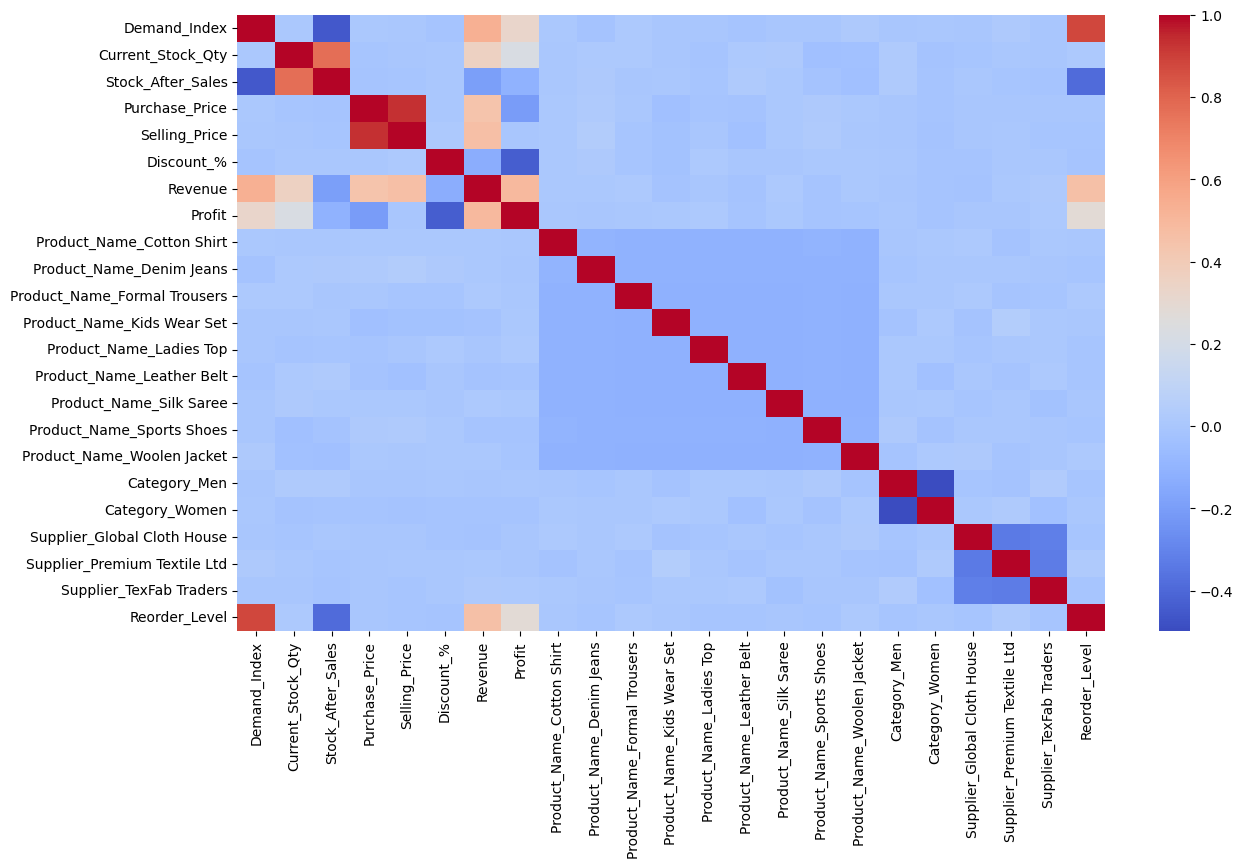

Reorder_Level                   1.000000
Demand_Index                    0.881048
Revenue                         0.459553
Stock_After_Sales               0.388949
Profit                          0.283409
Supplier_Premium Textile Ltd    0.026732
Product_Name_Formal Trousers    0.014214
Discount_%                      0.014021
Current_Stock_Qty               0.013762
Product_Name_Woolen Jacket      0.013178
Supplier_Global Cloth House     0.011428
Supplier_TexFab Traders         0.009595
Product_Name_Sports Shoes       0.009525
Product_Name_Denim Jeans        0.009074
Product_Name_Ladies Top         0.008675
Product_Name_Leather Belt       0.008326
Selling_Price                   0.008272
Category_Men                    0.007053
Purchase_Price                  0.005435
Category_Women                  0.003583
Product_Name_Cotton Shirt       0.001305
Product_Name_Silk Saree         0.000796
Product_Name_Kids Wear Set      0.000226
Name: Reorder_Level, dtype: float64


In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for correlation by combining X (features) and y (target)
# X already has categorical features encoded
df_corr = pd.concat([X, y], axis=1)

corr = df_corr.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

# Rank features by correlation with target
corr_target = corr[target].abs().sort_values(ascending=False)
print(corr_target)

In [79]:
# from sklearn.feature_selection import mutual_info_regression

# mi = mutual_info_regression(X,y)
# mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
# print(mi)


## Feature Selection

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X,y)
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

Demand_Index                    0.896373
Profit                          0.016127
Selling_Price                   0.014325
Revenue                         0.013809
Purchase_Price                  0.013687
Current_Stock_Qty               0.012776
Stock_After_Sales               0.008343
Discount_%                      0.005450
Category_Men                    0.001758
Category_Women                  0.001750
Supplier_TexFab Traders         0.001677
Supplier_Premium Textile Ltd    0.001631
Supplier_Global Cloth House     0.001600
Product_Name_Woolen Jacket      0.001387
Product_Name_Kids Wear Set      0.001349
Product_Name_Leather Belt       0.001209
Product_Name_Sports Shoes       0.001186
Product_Name_Formal Trousers    0.001168
Product_Name_Ladies Top         0.001159
Product_Name_Cotton Shirt       0.001134
Product_Name_Silk Saree         0.001090
Product_Name_Denim Jeans        0.001013
dtype: float64


In [81]:
# from xgboost import XGBRegressor

# xgb = XGBRegressor()
# xgb.fit(X, y)

# xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
# print(xgb_importances.sort_values(ascending=False))


In [82]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.model_selection import KFold

# model = ExtraTreesRegressor()
# selector = RFECV(estimator=model, cv=KFold(5), scoring='r2')
# selector.fit(X, y)
# selected_features=X.columns[selector.support_]
# print("Optimal Features:", selected_features)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# X_train = X_train[selected_features]
# X_test  = X_test[selected_features]
X_train.head(5)

,Demand_Index,Current_Stock_Qty,Stock_After_Sales,Purchase_Price,Selling_Price,Discount_%,Revenue,Profit,Product_Name_Cotton Shirt,Product_Name_Denim Jeans,Product_Name_Formal Trousers,Product_Name_Kids Wear Set,Product_Name_Ladies Top,Product_Name_Leather Belt,Product_Name_Silk Saree,Product_Name_Sports Shoes,Product_Name_Woolen Jacket,Category_Men,Category_Women,Supplier_Global Cloth House,Supplier_Premium Textile Ltd,Supplier_TexFab Traders
4227,471,220,92,923,1459,25,140064.0,21920.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4676,332,90,1,965,1479,0,131631.0,45746.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
800,218,41,0,583,982,20,32209.6,8306.6,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3671,326,62,0,1492,1700,20,84320.0,-8184.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4193,245,118,37,520,1066,0,86346.0,44226.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM": SVR(kernel="rbf")
}

In [87]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
results_df = results_df.sort_values(by="RMSE")

print("\nModel Comparison Results:\n")
print(results_df)


Model Comparison Results:

               Model        MAE       RMSE        R²
5  Gradient Boosting  18.489087  22.055495  0.870323
4      Random Forest  18.963660  22.821575  0.861158
6            XGBoost  20.136215  24.483951  0.840194
2              Lasso  24.309486  29.533202  0.767485
1              Ridge  24.318729  29.542720  0.767335
0  Linear Regression  24.320497  29.543781  0.767319
3      Decision Tree  24.924000  31.794339  0.730519
7                SVM  29.258870  37.007556  0.634902


In [88]:
best_model_name = results_df.iloc[0]["Model"]
best_rmse = results_df.iloc[0]["RMSE"]

print("Best Model:", best_model_name)
print("Best RMSE:", best_rmse)


Best Model: Gradient Boosting
Best RMSE: 22.055494646861906


# Paramerter Tuning for Gradient Boosting techniques

In [89]:
import optuna
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [90]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "random_state": 42
    }

    model = GradientBoostingRegressor(**params)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    )

    return -np.mean(scores)


In [91]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)


[I 2026-01-01 14:09:22,599] A new study created in memory with name: no-name-491ebcb9-822c-4624-a9f5-0e51d6258c50
[I 2026-01-01 14:10:25,168] Trial 0 finished with value: 18.49909836881097 and parameters: {'n_estimators': 361, 'learning_rate': 0.012149825786256245, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.8016047232499306, 'max_features': None}. Best is trial 0 with value: 18.49909836881097.
[I 2026-01-01 14:10:28,828] Trial 1 finished with value: 20.21473259762187 and parameters: {'n_estimators': 319, 'learning_rate': 0.02227461692330226, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 10, 'subsample': 0.9020690079724449, 'max_features': 'sqrt'}. Best is trial 0 with value: 18.49909836881097.
[I 2026-01-01 14:10:30,055] Trial 2 finished with value: 18.57631773509967 and parameters: {'n_estimators': 164, 'learning_rate': 0.15634590170361998, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 15, 'subsample': 0.719953547341629,

In [92]:
print("Best MAE:", study.best_value)
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")


Best MAE: 18.401384026571318
Best Parameters:
n_estimators: 441
learning_rate: 0.013208973734604404
max_depth: 2
min_samples_split: 19
min_samples_leaf: 10
subsample: 0.8958766547474962
max_features: None


In [93]:
best_model = GradientBoostingRegressor(
    **study.best_params,
    random_state=42
)

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
])

final_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.013208973734604404
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",441
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8958766547474962


In [94]:
y_pred = final_pipeline.predict(X_test)
r2_gb = r2_score(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f"Test accuracy: {r2_gb:.4f}")
print(f"Test MAE: {mae_gb:.4f}")
print(f"Test RMSE: {rmse_gb:.4f}")


Test accuracy: 0.8719
Test MAE: 18.3575
Test RMSE: 21.9196


# Hyper paramerter tuning for Random Forest

In [95]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


In [96]:
def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 5, 40),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_float("max_features", 0.5, 1.0),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestRegressor(**params)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    )

    return -np.mean(scores)


In [97]:
rf_study = optuna.create_study(direction="minimize")
rf_study.optimize(rf_objective, n_trials=50)

[I 2026-01-01 14:13:17,433] A new study created in memory with name: no-name-1cf1bca9-5021-4951-80cd-495fe4099957
[I 2026-01-01 14:13:27,606] Trial 0 finished with value: 18.407684934663347 and parameters: {'n_estimators': 767, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 0.5778100583860194, 'bootstrap': True}. Best is trial 0 with value: 18.407684934663347.
[I 2026-01-01 14:13:40,144] Trial 1 finished with value: 19.635088138156483 and parameters: {'n_estimators': 384, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 0.9736548521008597, 'bootstrap': False}. Best is trial 0 with value: 18.407684934663347.
[I 2026-01-01 14:13:43,634] Trial 2 finished with value: 18.397848214800927 and parameters: {'n_estimators': 320, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 0.5388542094756845, 'bootstrap': True}. Best is trial 2 with value: 18.397848214800927.
[I 2026-01-01 14:13:53,427] Trial 3 f

In [98]:
print("Best MAE:", rf_study.best_value)
print("Best Parameters:")
for k, v in rf_study.best_params.items():
    print(f"{k}: {v}")


Best MAE: 18.35171351498922
Best Parameters:
n_estimators: 354
max_depth: 5
min_samples_split: 2
min_samples_leaf: 6
max_features: 0.8819420637972392
bootstrap: True


In [99]:
best_rf = RandomForestRegressor(
    **rf_study.best_params,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_rf)
])

rf_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",354
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_sam

In [100]:
y_pred_rf = rf_pipeline.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(((y_test - y_pred_rf) ** 2).mean())
print(f"RF Test accuracy: {r2_rf:.4f}")
print(f"Random Forest Test MAE: {mae_rf:.4f}")
print(f"Random Forest Test RMSE: {rmse_rf:.4f}")


RF Test accuracy: 0.8708
Random Forest Test MAE: 18.4696
Random Forest Test RMSE: 22.0147


# XGBoosting algorithms

In [101]:
import optuna
import numpy as np
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


In [102]:
def xgb_objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
        "objective": "reg:squarederror",
        "random_state": 42,
        "tree_method": "hist",
        "n_jobs": -1
    }

    model = xgb.XGBRegressor(**params)

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    )

    return -np.mean(scores)


In [103]:
xgb_study = optuna.create_study(direction="minimize")
xgb_study.optimize(xgb_objective, n_trials=50)


[I 2026-01-01 14:21:05,335] A new study created in memory with name: no-name-6d1aee76-7f90-4368-ad2b-114a2c58cf95
[I 2026-01-01 14:21:08,667] Trial 0 finished with value: 19.41989631652832 and parameters: {'n_estimators': 404, 'max_depth': 7, 'learning_rate': 0.103647982168309, 'subsample': 0.8092968459029173, 'colsample_bytree': 0.906791133152546, 'gamma': 4.616526978765233, 'min_child_weight': 6, 'reg_alpha': 6.901565115170571, 'reg_lambda': 9.657072674967374}. Best is trial 0 with value: 19.41989631652832.
[I 2026-01-01 14:21:12,206] Trial 1 finished with value: 20.197523498535155 and parameters: {'n_estimators': 1078, 'max_depth': 6, 'learning_rate': 0.1810419673050844, 'subsample': 0.775865454345242, 'colsample_bytree': 0.8171597005352478, 'gamma': 3.618051777604705, 'min_child_weight': 9, 'reg_alpha': 7.404322652840428, 'reg_lambda': 6.129512436909385}. Best is trial 0 with value: 19.41989631652832.
[I 2026-01-01 14:21:14,277] Trial 2 finished with value: 20.321954345703126 and p

In [104]:
print("Best MAE:", xgb_study.best_value)
print("Best XGBoost Parameters:")

for k, v in xgb_study.best_params.items():
    print(f"{k}: {v}")


Best MAE: 18.525941467285158
Best XGBoost Parameters:
n_estimators: 330
max_depth: 5
learning_rate: 0.015478054724003931
subsample: 0.8411052146306093
colsample_bytree: 0.9731186214416059
gamma: 4.752854410525319
min_child_weight: 6
reg_alpha: 0.8664104956295824
reg_lambda: 8.415086251150328


In [105]:
best_xgb = xgb.XGBRegressor(
    **xgb_study.best_params,
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_xgb)
])

xgb_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None


In [106]:
y_pred_xgb = xgb_pipeline.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(((y_test - y_pred_xgb) ** 2).mean())

print(f"XGBoost Test MAE: {mae_xgb:.2f}")
print(f"XGBoost Test RMSE: {rmse_xgb:.2f}")


XGBoost Test MAE: 18.64
XGBoost Test RMSE: 22.30


In [107]:
print(f"XGBoost Test Accuracy: {r2_xgb:.2f}")

XGBoost Test Accuracy: 0.87


In [108]:
print(f"""
Model Performance Summary
-------------------------
Gradient Boosting  MAE : {mae_gb:.2f}
Random Forest      MAE : {mae_rf:.2f}
XGBoost            MAE : {mae_xgb:.2f}
""")



Model Performance Summary
-------------------------
Gradient Boosting  MAE : 18.36
Random Forest      MAE : 18.47
XGBoost            MAE : 18.64



In [117]:
import joblib

joblib.dump(xgb_pipeline.named_steps["model"], "XGBoost_RWTD.pkl")
joblib.dump(xgb_pipeline.named_steps["scaler"], "XGB_scaler_RWTD.pkl")


['XGB_scaler_RWTD.pkl']

In [110]:
# import joblib

# joblib.dump(rf_pipeline.named_steps["model"], "RandomForest_RWTD.pkl")
# joblib.dump(rf_pipeline.named_steps["scaler"], "RF_scaler_RWTD.pkl")


In [118]:
import joblib

joblib.dump(final_pipeline.named_steps["model"], "Gradient_Boosting_model_RWTD.pkl")
joblib.dump(final_pipeline.named_steps["scaler"], "feature_scaler_RWTD.pkl")


['feature_scaler_RWTD.pkl']

In [119]:
import joblib

scaler = joblib.load("feature_scaler_RWTD.pkl")
print(scaler.feature_names_in_)


['Demand_Index' 'Current_Stock_Qty' 'Stock_After_Sales' 'Purchase_Price'
 'Selling_Price' 'Discount_%' 'Revenue' 'Profit'
 'Product_Name_Cotton Shirt' 'Product_Name_Denim Jeans'
 'Product_Name_Formal Trousers' 'Product_Name_Kids Wear Set'
 'Product_Name_Ladies Top' 'Product_Name_Leather Belt'
 'Product_Name_Silk Saree' 'Product_Name_Sports Shoes'
 'Product_Name_Woolen Jacket' 'Category_Men' 'Category_Women'
 'Supplier_Global Cloth House' 'Supplier_Premium Textile Ltd'
 'Supplier_TexFab Traders']


In [115]:
# print(y.describe())


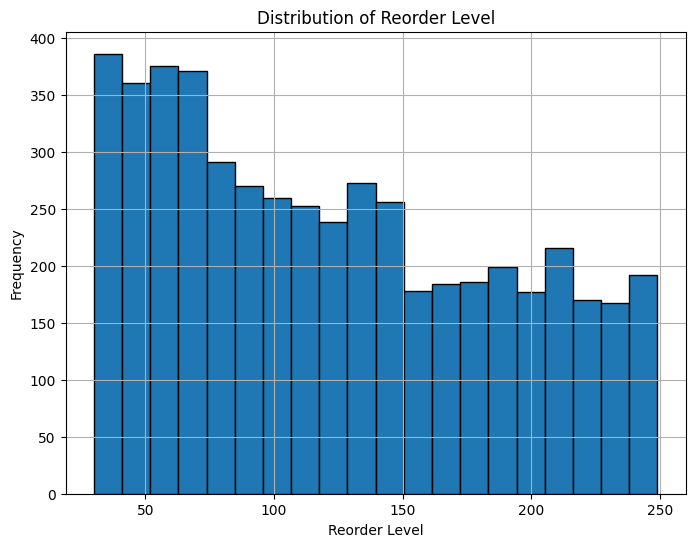

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, edgecolor='black')
plt.title('Distribution of Reorder Level')
plt.xlabel('Reorder Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()